# Day 7

## Part 1

Network analysis using Python [NetworkX](https://networkx.org) library.

In [83]:
import networkx as nx
import matplotlib.pyplot as plt

def getGraphNX(lines):
    G = nx.DiGraph() # Directed graphs, i.e. graphs with directed edges.
    for l in lines:
        G.add_edge(l.split(" ")[1],l.split(" ")[7])
    return G

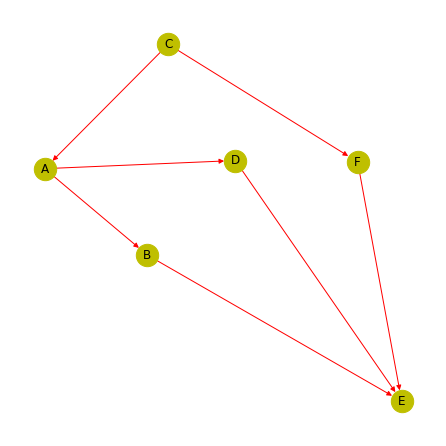

In [84]:
lines_test = [
"Step C must be finished before step A can begin.",
"Step C must be finished before step F can begin.",
"Step A must be finished before step B can begin.",
"Step A must be finished before step D can begin.",
"Step B must be finished before step E can begin.",
"Step D must be finished before step E can begin.",
"Step F must be finished before step E can begin."
]

Gx_test = getGraphNX(lines_test)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(Gx_test)
nx.draw(Gx_test,pos,cmap=plt.get_cmap('jet'),node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(Gx_test, pos)

NetworkX has severa network handy sorting algorithms implemented, among which [lexicographical topological sort](https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.dag.lexicographical_topological_sort.html), that return a `lexicographically_topologically_sorted_nodes` object, an iterable of node names in lexicographical topological sort order.

See also: https://en.wikipedia.org/wiki/Topological_sorting

In [85]:
print("Test 1:","".join(nx.lexicographical_topological_sort(G_test)))

Test 1: CABDFE


Part 1: MNQKRSFWGXPZJCOTVYEBLAHIUD


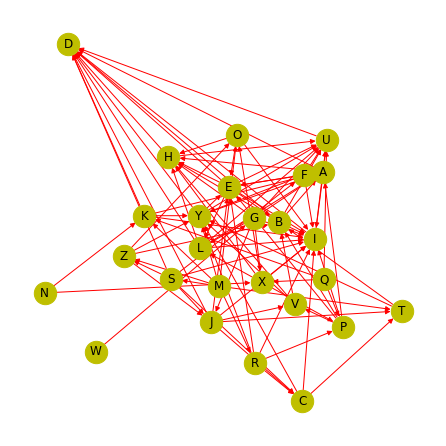

In [87]:
with open('data/input07.txt') as f:
    lines = [l.strip("\n") for l in f.readlines()]

Gx = getGraph(lines)

plt.figure(figsize=(6,6))
pos = nx.spring_layout(Gx)
nx.draw(Gx,pos,node_size = 500,edge_color='r',node_color="y")
lab = nx.draw_networkx_labels(Gx,pos)
    
print("Part 1:","".join(nx.lexicographical_topological_sort(Gx)))

## Part 1

`NetworkX` is powerful and I'm glad I learned about its existence, but I also wanted to implement my own topological sort to understand how it work. Here it is:

In [100]:
from collections import defaultdict 
  
class Graph: 
    def __init__(self): 
        self.graph = defaultdict(list)
        self.V = []
  
    def addEdge(self,u,v): 
        self.graph[u].append(v)
        if u not in self.V:
            self.V.append(u)
        if v not in self.V:
            self.V.append(v)

    def topologicalSortVertex(self,v,visited,stack): 
        # mark the current node as visited
        visited[self.V.index(v)] = True
        # Recur for all the vertices adjacent to current vertex 
        av = self.graph[v]
        # sort recurred vertices in *reverse* order
        av.sort(reverse=True) 
        for u in av:
            if visited[self.V.index(u)] == False: 
                self.topologicalSortVertex(u,visited,stack) 
        # Push current vertex to beginning of stack
        stack.insert(0,v) 
            
    def topologicalSort(self):
        # sort vertices in *reverse* order
        self.V.sort(reverse=True) 
        # mark all vertices as not visited
        visited = [False]*len(self.V)
        # Initialize stack
        stack = [] 
        # Call recursive helper function to compute topological sort and
        # store result in stack, starting from *last* vertex accoding to sorting
        for v in self.V: 
            if visited[self.V.index(v)] == False: 
                self.topologicalSortVertex(v,visited,stack) 
        return stack 

In [101]:
G_test = Graph()
for l in lines_test:
    G_test.addEdge(l.split(" ")[1],l.split(" ")[7])
print("".join(G_test.topologicalSort()))

CABDFE


In [102]:
G = Graph()
for l in lines:
    G.addEdge(l.split(" ")[1],l.split(" ")[7])
print("".join(G.topologicalSort()))

MNQKRSFWGXPZJCTVOYEBLAHIUD
